In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
data = pd.read_csv('listings.csv')

In [3]:
data.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,22493,2.255200e+04,22526,22552,22552,22552.000000,22552.000000,22552,22552.000000,22552.000000,22552.000000,18644,18638.000000,22552.000000,22552.000000
unique,NaN,21873,NaN,5997,12,136,NaN,NaN,3,NaN,NaN,NaN,1312,NaN,NaN,NaN
top,NaN,Berlin Wohnung,NaN,Anna,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,NaN,NaN,Private room,NaN,NaN,NaN,2018-11-04,NaN,NaN,NaN
freq,NaN,14,NaN,216,5497,1325,NaN,NaN,11534,NaN,NaN,NaN,618,NaN,NaN,NaN
mean,1.571560e+07,NaN,5.403355e+07,NaN,NaN,NaN,52.509824,13.406107,NaN,67.143668,7.157059,17.840679,NaN,1.135525,1.918233,79.852829
std,8.552069e+06,NaN,5.816290e+07,NaN,NaN,NaN,0.030825,0.057964,NaN,220.266210,40.665073,36.769624,NaN,1.507082,3.667257,119.368162
min,2.015000e+03,NaN,2.217000e+03,NaN,NaN,NaN,52.345803,13.103557,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,8.065954e+06,NaN,9.240002e+06,NaN,NaN,NaN,52.489065,13.375411,NaN,30.000000,2.000000,1.000000,NaN,0.180000,1.000000,0.000000
50%,1.686638e+07,NaN,3.126711e+07,NaN,NaN,NaN,52.509079,13.416779,NaN,45.000000,2.000000,5.000000,NaN,0.540000,1.000000,4.000000
75%,2.258393e+07,NaN,8.067518e+07,NaN,NaN,NaN,52.532669,13.439259,NaN,70.000000,4.000000,16.000000,NaN,1.500000,1.000000,129.000000


#### Shape of the input database

In [4]:
data.shape

(22552, 16)

#### Changing categorical variables to numerical values
- creating encoding dictionaries for numerical values

In [5]:
data['neighbour_group_cat'] = data.neighbourhood_group.astype('category').cat.codes
data['neighbour_cat'] = data.neighbourhood.astype('category').cat.codes
data['room_type_cat'] = data.room_type.astype('category').cat.codes

#print(data.neighbourhood_group.unique())
#print(data.neighbourhood.unique())
#print(data.room_type.unique())

def make_dict(column):
    dicto = {}
    collist = data[column].unique()
    for i in range(len(collist)):
        dicto[i] = collist[i]
    return dicto

neighbourhood_cat_encode = make_dict('neighbourhood');
neighbourhood_group_cat_encode = make_dict('neighbourhood_group');
room_type_encode = make_dict('room_type')

In [6]:
room_type_encode

{0: 'Entire home/apt', 1: 'Private room', 2: 'Shared room'}

### Checkin data for outliers, etc.

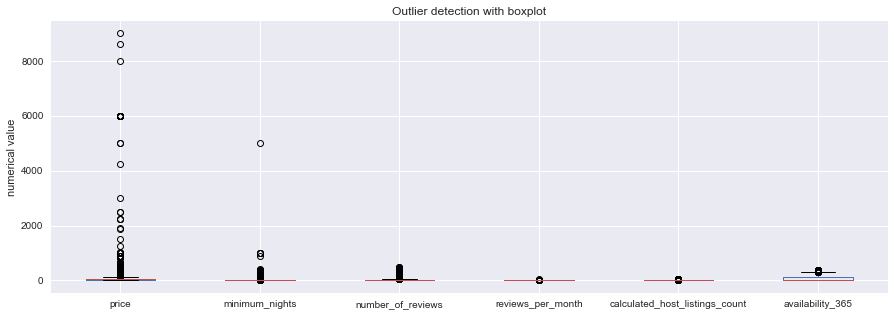

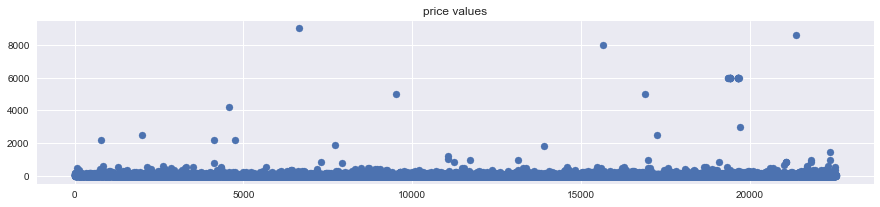

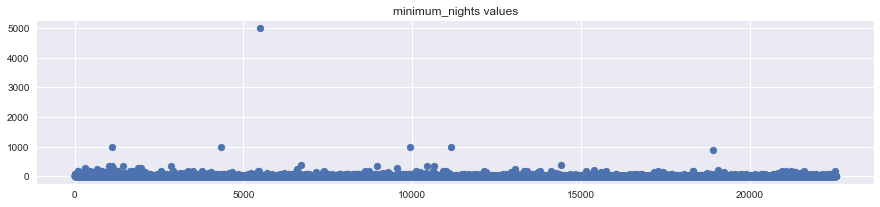

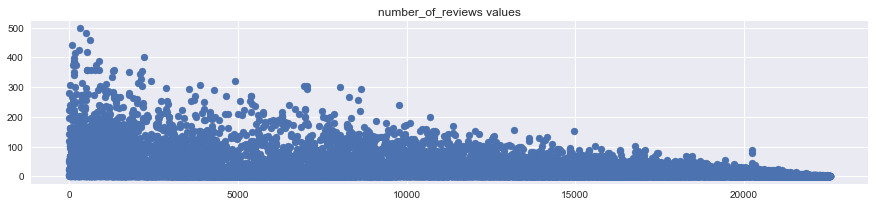

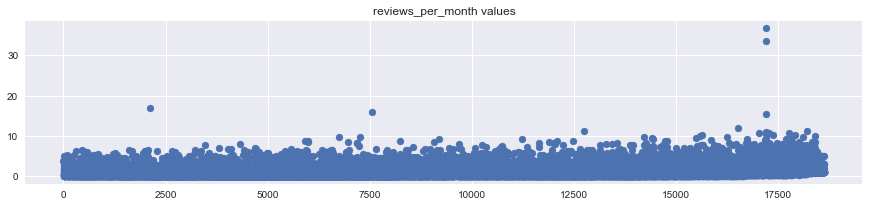

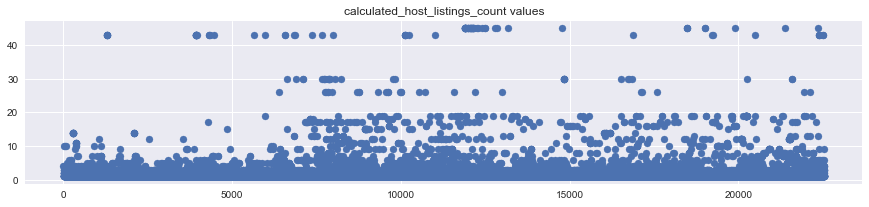

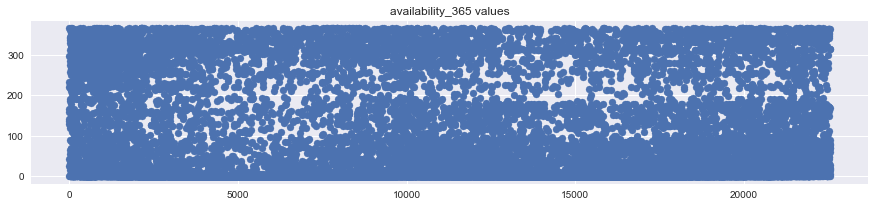

In [7]:
numeric_columns = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

data[numeric_columns].boxplot(figsize= (15,5))
ax = plt.gca()
ax.set_title('Outlier detection with boxplot')
ax.set_ylabel('numerical value')

for column in numeric_columns:
    plt.figure()
    plt.scatter(range(len(data[column].dropna())),data[column].dropna());
    fig = plt.gcf()
    fig.set_size_inches(15,3)
    ax = plt.gca()
    ax.set_title(column + ' values')

Columns Price Values, minimum_nights, reviews per month values have outliers which can interfere with machine learning. Outliers are to be removed

### Outlier removal

In [8]:
def remove_outlier(column_name):
    datapoints_in = len(data)
    q25, q75 = np.percentile(data[column_name], 25), np.percentile(data[column_name], 75)
    cutoff = (q75-q25) * 1.5
    lower, upper = q25 - cutoff, q75 + cutoff
    data.drop(data[(data[column_name] < lower) | (data[column_name]> upper)].index, inplace = True)
    datapoints_out = len(data)
    removed_entries = datapoints_in - datapoints_out
    return print('Removed ', removed_entries, 'datapoints because of ', column_name, 'outliers')

remove_outlier('price')

Removed  1248 datapoints because of  price outliers


remove_outlier('minimum_nights') #removed a lot of data - to check feasibility

In [9]:
print('Remaining data:', len(data))

Remaining data: 21304


### Plotting data after removal of outliers

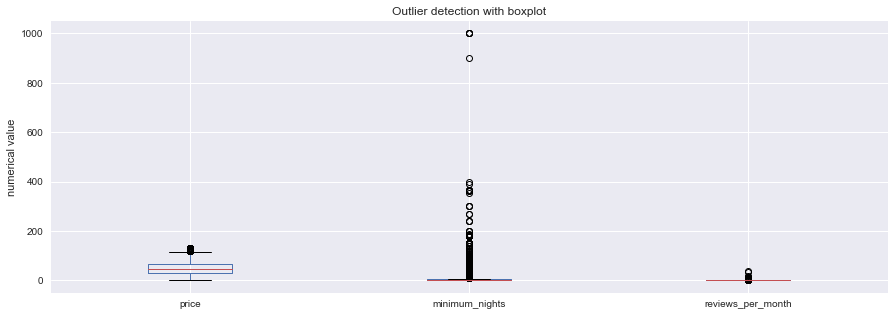

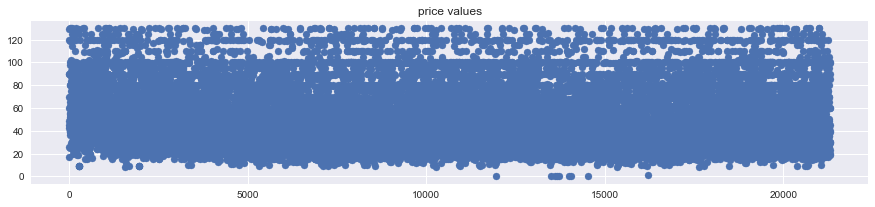

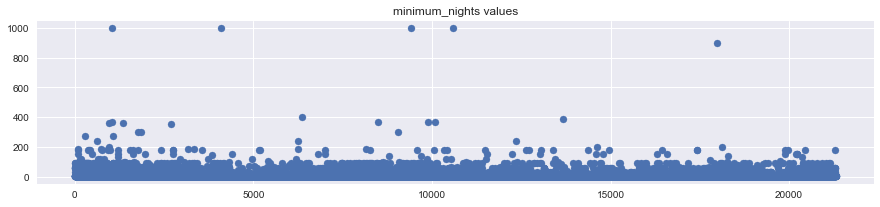

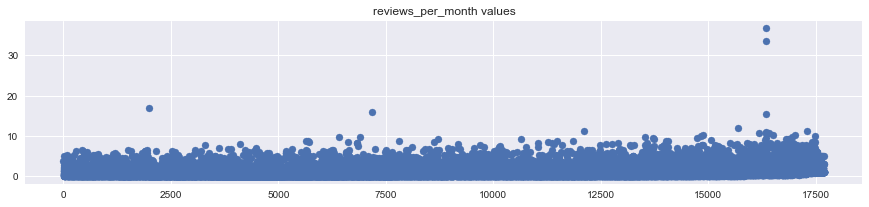

In [10]:
columns = ['price','minimum_nights', 'reviews_per_month']

data[columns].boxplot(figsize= (15,5))
ax = plt.gca()
ax.set_title('Outlier detection with boxplot')
ax.set_ylabel('numerical value')

for column in columns:
    plt.figure()
    plt.scatter(range(len(data[column].dropna())),data[column].dropna());
    fig = plt.gcf()
    fig.set_size_inches(15,3)
    ax = plt.gca()
    ax.set_title(column + ' values')

### filtering features for machine learning

In [11]:
useless_columns = ['name', 'host_id', 'host_name', 'neighbourhood_group',
                  'neighbourhood', 'last_review', 'room_type', 'reviews_per_month',
                  ]
dat = data.drop(useless_columns, axis = 1)

In [12]:
dat.set_index('id', inplace = True)
dat.describe(include = 'all')

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbour_group_cat,neighbour_cat,room_type_cat
count,21304.000000,21304.000000,21304.000000,21304.000000,21304.000000,21304.000000,21304.000000,21304.000000,21304.000000,21304.000000
mean,52.509584,13.406844,50.312007,7.047174,17.615424,1.848104,75.511923,4.153586,77.971226,0.560130
std,0.031085,0.057974,25.560822,23.888237,36.695394,3.649095,116.668681,2.947247,39.453324,0.522999
min,52.345803,13.103557,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.488496,13.376066,30.000000,2.000000,1.000000,1.000000,0.000000,1.000000,37.000000,0.000000
50%,52.508724,13.417857,45.000000,2.000000,5.000000,1.000000,1.000000,4.000000,93.000000,1.000000
75%,52.532701,13.439968,65.000000,4.000000,16.000000,1.000000,112.000000,6.000000,110.000000,1.000000
max,52.650161,13.757642,130.000000,1000.000000,498.000000,45.000000,365.000000,11.000000,135.000000,2.000000


In [13]:
dat.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbour_group_cat,neighbour_cat,room_type_cat
latitude,1.000000,-0.113425,0.046602,0.016207,0.036535,0.042788,0.010153,-0.143159,-0.130365,-0.024934
longitude,-0.113425,1.000000,-0.009857,-0.037100,-0.023241,-0.036773,-0.075851,-0.043406,-0.173907,0.013531
price,0.046602,-0.009857,1.000000,0.020015,0.090258,0.042732,0.192159,-0.028505,-0.063494,-0.547583
minimum_nights,0.016207,-0.037100,0.020015,1.000000,-0.032275,0.049164,0.161233,-0.005299,-0.012479,-0.128029
number_of_reviews,0.036535,-0.023241,0.090258,-0.032275,1.000000,0.084029,0.284365,-0.012289,-0.038722,-0.025012
calculated_host_listings_count,0.042788,-0.036773,0.042732,0.049164,0.084029,1.000000,0.240067,0.001183,-0.055342,-0.009332
availability_365,0.010153,-0.075851,0.192159,0.161233,0.284365,0.240067,1.000000,0.034239,-0.060891,-0.071713
neighbour_group_cat,-0.143159,-0.043406,-0.028505,-0.005299,-0.012289,0.001183,0.034239,1.000000,0.074343,-0.021188
neighbour_cat,-0.130365,-0.173907,-0.063494,-0.012479,-0.038722,-0.055342,-0.060891,0.074343,1.000000,0.021324
room_type_cat,-0.024934,0.013531,-0.547583,-0.128029,-0.025012,-0.009332,-0.071713,-0.021188,0.021324,1.000000


## Preparing data set for training

In [14]:
y = dat['price']
X = dat.drop('price', axis = 1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 23)

In [16]:
print('Checking dimensions of training, testing sets and labels')
len(X_train), len(y_train), len(X_test), len(y_test)

Checking dimensions of training, testing sets and labels


(14273, 14273, 7031, 7031)

## Model wth RandomForestRegressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
rgr = RandomForestRegressor().fit(X_train, y_train)
y_pred = rgr.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
rgr.score(X_test, y_test)


print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 397.12


In [42]:
y_testo = pd.DataFrame(y_test)
y_testo.reset_index(inplace = True)
y_predo = pd.DataFrame(y_pred, columns = ['price_pred_RFR'])
result = y_testo.merge(y_predo, left_index = True, right_index = True)
resulto = result[result['price'] < 400]
resulto.set_index('id', inplace = True)
resulto.iloc[25:30]
resulto.describe()

,price,price_pred_RFR
count,7031.000000,7031.000000
mean,50.050348,51.074777
std,25.472938,17.877693
min,0.000000,9.200000
25%,30.000000,36.425000
50%,45.000000,47.300000
75%,65.000000,64.720000
max,130.000000,110.890000


## Kernelized Support Vector Machines

In [40]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf').fit(X_train, y_train)
y_pred_ksvn = ksvm.predict(X_test)


In [45]:
print("Mean squared error : {:.2f}".format(mean_squared_error(y_test, y_pred_ksvn)))

Mean squared error : 902.34


### Kernelized SVM with scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
ksvm_scaled = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
y_pred_ksvn_sc = ksvm_scaled.predict(X_test_scaled)

In [46]:
def evaluate_ml (predicted_values):
    print("Mean squared error : {:.2f}".format(mean_squared_error(y_test, predicted_values)))

In [47]:
evaluate_ml(y_pred_ksvn_sc)

Mean squared error : 549.57


## sklearn NN

In [48]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = 'relu',
                             alpha = 0.001,
                             solver = 'lbfgs').fit(X_train_scaled, y_train)
y_pred_mlpreg = mlpreg.predict(X_test_scaled)

C:\Users\Tola\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [49]:
evaluate_ml(y_pred_mlpreg)

Mean squared error : 395.25


### RandomForest with KFold

In [54]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)

for train_index, test_index in kf.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
    rf = RandomForestRegressor().fit(X_train, y_train)
    y_pred_k = rf.predict(X_test)
    evaluate_ml(y_pred_k)

Mean squared error : 394.93
Mean squared error : 408.63
Mean squared error : 408.54
Mean squared error : 403.81
Mean squared error : 389.47
